"El dolor es el elemento positivo de este mundo, más bien el único vínculo entre este mundo y lo positivo en sí."
                                                                                                    ⎯Franz Kafka

----

#### CONTEXTO

> El principal propósito es el lograr identificar si un paciente es o no propenso a desarrollar cáncer de pulmón basándose en factores personales y clínicos como edad, historial de tabaquismo y condiciones respiratorias.

----

#### CONFIGURACIÓN INICIAL

In [35]:
# Importación de librerías:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_score, recall_score, f1_score)

warnings.filterwarnings('ignore')

In [2]:
# Importación del Dataset:
slc = pd.read_csv("../Dataset/SurveyLungCancer.csv")

----

#### I. EXPLORACIÓN DE DATOS

In [3]:
# Encabezado de datos:
slc.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


##### Listado de datos almacenados:

- Gender: Género del paciente.
> Clasificado entre  M(male) o F(female).
- Age:  Edad del paciente.
> Identificado por medio de un valor númerico entero.
- Smoking: Identifica si el paciente es fumador.
> Clasificado entre 2(Sí) o 1(No).
- Yellow fingers: Identifica si el paciente posee dedos amarillentos.
> Clasificado entre 2(Sí) o 1(No).
- Anxiety: Identifica si el paciente padece de ansiedad.
> Clasificado entre 2(Sí) o 1(No).
- Peer_pressure: Identifica si el paciente experimenta presión social.
> Clasificado entre 2(Sí) o 1(No).
- Chronic Disease: Identifica si el paciente padece alguna enfermedad crónica.
> Clasificado entre 2(Sí) o 1(No).
- Fatigue: Identifica si el paciente padece de fatiga.
> Clasificado entre 2(Sí) o 1(No).
- Allergy: Identifica si el paciente padece alguna alergia.
> Clasificado entre 2(Sí) o 1(No).
- Wheezing: Identifica si el paciente produce un silbido al respirar (sibilancia).
> Clasificado entre 2(Sí) o 1(No).
- Alcohol: Identifica si el paciente consume alcohol de manera habitual/excesiva (alcohólico).
> Clasificado entre 2(Sí) o 1(No).
- Coughing: Identifica si el paciente padece de tos.
> Clasificado entre 2(Sí) o 1(No).
- Shortness of Breath: Identifica si el paciente padece de dificultad para respirar (disnea).
> Clasificado entre 2(Sí) o 1(No).
- Swallowing Difficulty: Identifica si el paciente padece de dificultad para tragar (disfagia).
> Clasificado entre 2(Sí) o 1(No).
- Chest pain: Identifica si el paciente padece de dolor torácico.
> Clasificado entre 2(Sí) o 1(No).
- Lung Cancer: Identifica si el paciente padece de cáncer pulmonar.
> Clasificado entre YES(Sí) o NO(No).


---- Valores nulos:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


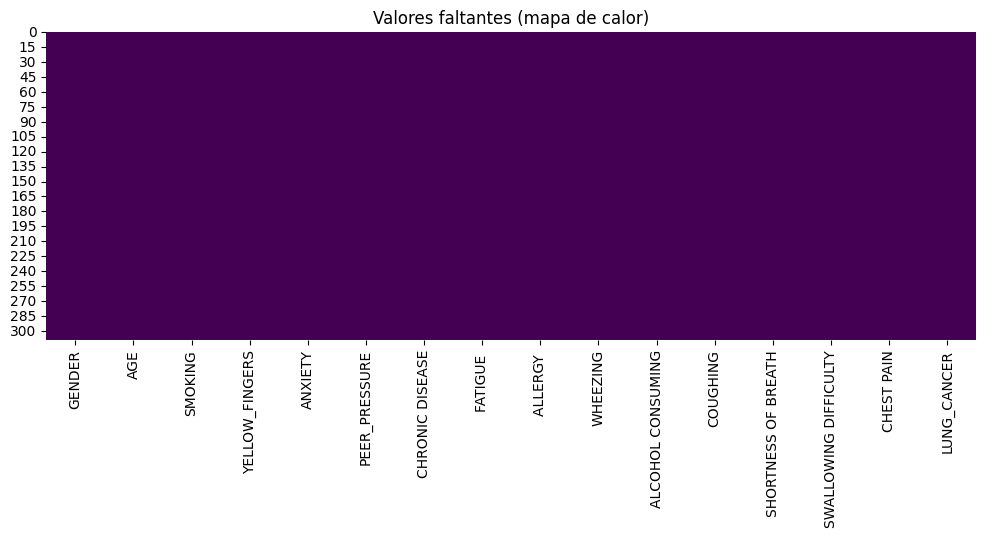

In [4]:
print('\n---- Valores nulos:')
print(slc.isnull().sum())

# Visualización con Heatmap:
plt.figure(figsize=(12, 4))
sns.heatmap(slc.isnull(), cbar=False, cmap='viridis')
plt.title('Valores faltantes (mapa de calor)')
plt.show()

> Dado que no se posee ningún valor nulo dentro del Dataset, no se requiere ninguna estrategia de imputación (media, mediana, moda) ni de eliminación.

----

#### II. PREPROCESAMIENTO Y TRANSFORMACIÓN DE DATOS

In [5]:
# Nombres de las columnas del Dataset:
slc.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [6]:
# Correción de los nombres de las columnas:
slc.columns = slc.columns.str.strip().str.replace(' ', '_')

# Este cambio permite una estandarización en los nombres.
slc.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

> Actualmente el Dataset posee una clasificación binaria incorrecta. Su corrección se hará, principalmente, por medio de mapeos.

In [7]:
# Dado que 'Lung Cancer' es la única columna clasificada entre 'YES' o 'NO', se iniciará con este.
slc['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

In [8]:
# Lung Cancer: (YES/NO) a binario (1/0)
slc['LUNG_CANCER'] = slc['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

> El campo 'Age' está bien validado, teniendo valores desde 21 a 87 años.

In [9]:
# Similar a 'Lung Cancer', 'Gender' es la única columna clasificado entre 'M' o 'F'.
slc['GENDER'].value_counts()

GENDER
M    162
F    147
Name: count, dtype: int64

In [10]:
# Gender: (M/F) a binario (1/0)
slc['GENDER'] = slc['GENDER'].map({'M': 1, 'F': 0})

> El resto de columnas con una clasificación binaria incorrecta no poseen valores fuera de rango, por ello simplemente se hará una corrección de 2/1 a 1/0.

In [11]:
# Columnas a aplicar el cambio:
columns = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE',
    'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING',
    'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN'
]

# Reemplazo de valores en las columnas:
slc[columns] = slc[columns].replace({2:1, 1:0})

> Una vez codificados los datos, podemos realizar un análisis visual de la distribución de AGE y la prevalencia de las demás características.

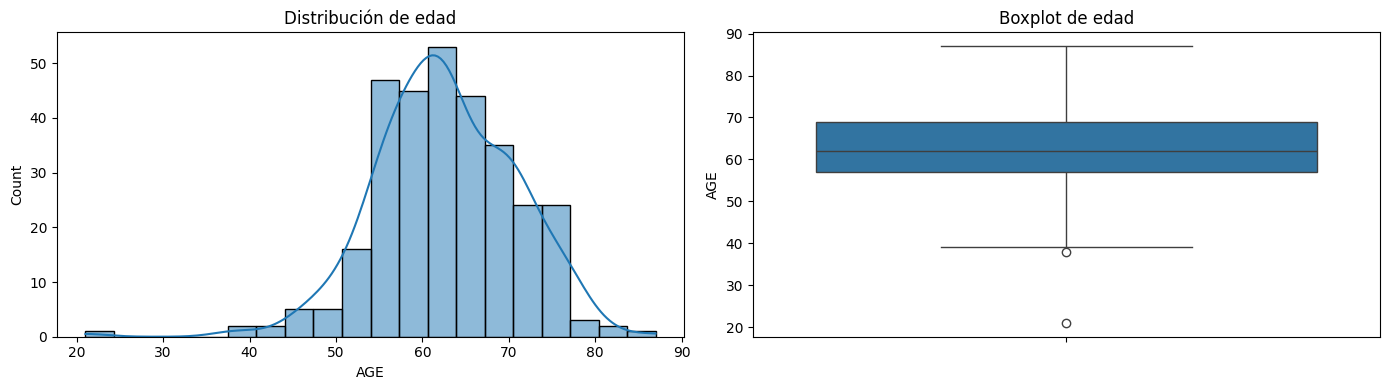


---- Prevalencia de características:
LUNG_CANCER              0.873786
FATIGUE                  0.673139
SHORTNESS_OF_BREATH      0.640777
COUGHING                 0.579288
YELLOW_FINGERS           0.569579
SMOKING                  0.563107
ALLERGY                  0.556634
WHEEZING                 0.556634
ALCOHOL_CONSUMING        0.556634
CHEST_PAIN               0.556634
GENDER                   0.524272
CHRONIC_DISEASE          0.504854
PEER_PRESSURE            0.501618
ANXIETY                  0.498382
SWALLOWING_DIFFICULTY    0.469256
dtype: float64


In [12]:
# Representación de la distribución por edad.
plt.figure(figsize=(14, 4))

# Histograma:
plt.subplot(1, 2, 1)
sns.histplot(slc['AGE'], kde=True, bins=20)
plt.title('Distribución de edad')

# Boxplot (Detección de Outliers)
plt.subplot(1, 2, 2)
sns.boxplot(y=slc['AGE'])
plt.title('Boxplot de edad')

plt.tight_layout()
plt.show()

print('\n---- Prevalencia de características:')
print(slc.drop(columns=['AGE']).mean().sort_values(ascending=False))

> Como puede ser observado, las edades más prominentes se encuentran entre los 58 y 68 años. De igual manera, la media de datos indica:

- LUNG_CANCER (87.4%): Presenta la prevalencia más alta, lo que sugiere que una gran mayoría de los individuos del Dataset han sido diagnosticados con cáncer de pulmón. Esto podría deberse a que el conjunto de datos esté sesgado hacia casos positivos. :/
> Entre los síntomas más frecuentes destacan:

- FATIGUE (67.3%)
- SHORTNESS_OF_BREATH (64.1%)
- COUGHING (57.9%)
> Estos datos son típicamente asociados con enfermedades respiratorias crónicas, incluyendo el cáncer pulmonar.

- SMOKING (56.3%)
- ALCOHOL_CONSUMING (55.7%)
> Estos muestran una alta prevalencia, lo cual es consistente con el conocimiento médico: identificando el consumo de tabaco y alcohol como factores de riesgo relevantes en el desarrollo de cáncer de pulmón.

- WHEEZING (55.7%)
- ALLERGY (55.7%)
- CHEST_PAIN (55.7%)
> Estas son principalmente relacionadas a condiciones respiratorias y alérgicasl

- GENDER (52.4%)
> Sugiere una distribución relativamente equilibrada entre ambos sexos.

- CHRONIC_DISEASE (50.5%)
- PEER_PRESSURE (50.2%)
- ANXIETY (49.8%)
> Estas úlltimas variables indican claramente como la mitad de los individuos presentan estas condiciones o antecedentes.

- SWALLOWING_DIFFICULTY (46.9%)
> La variable menos frecuente, aunque no por ello menos significativa, pues afecta a casi la mitad de la muestra.

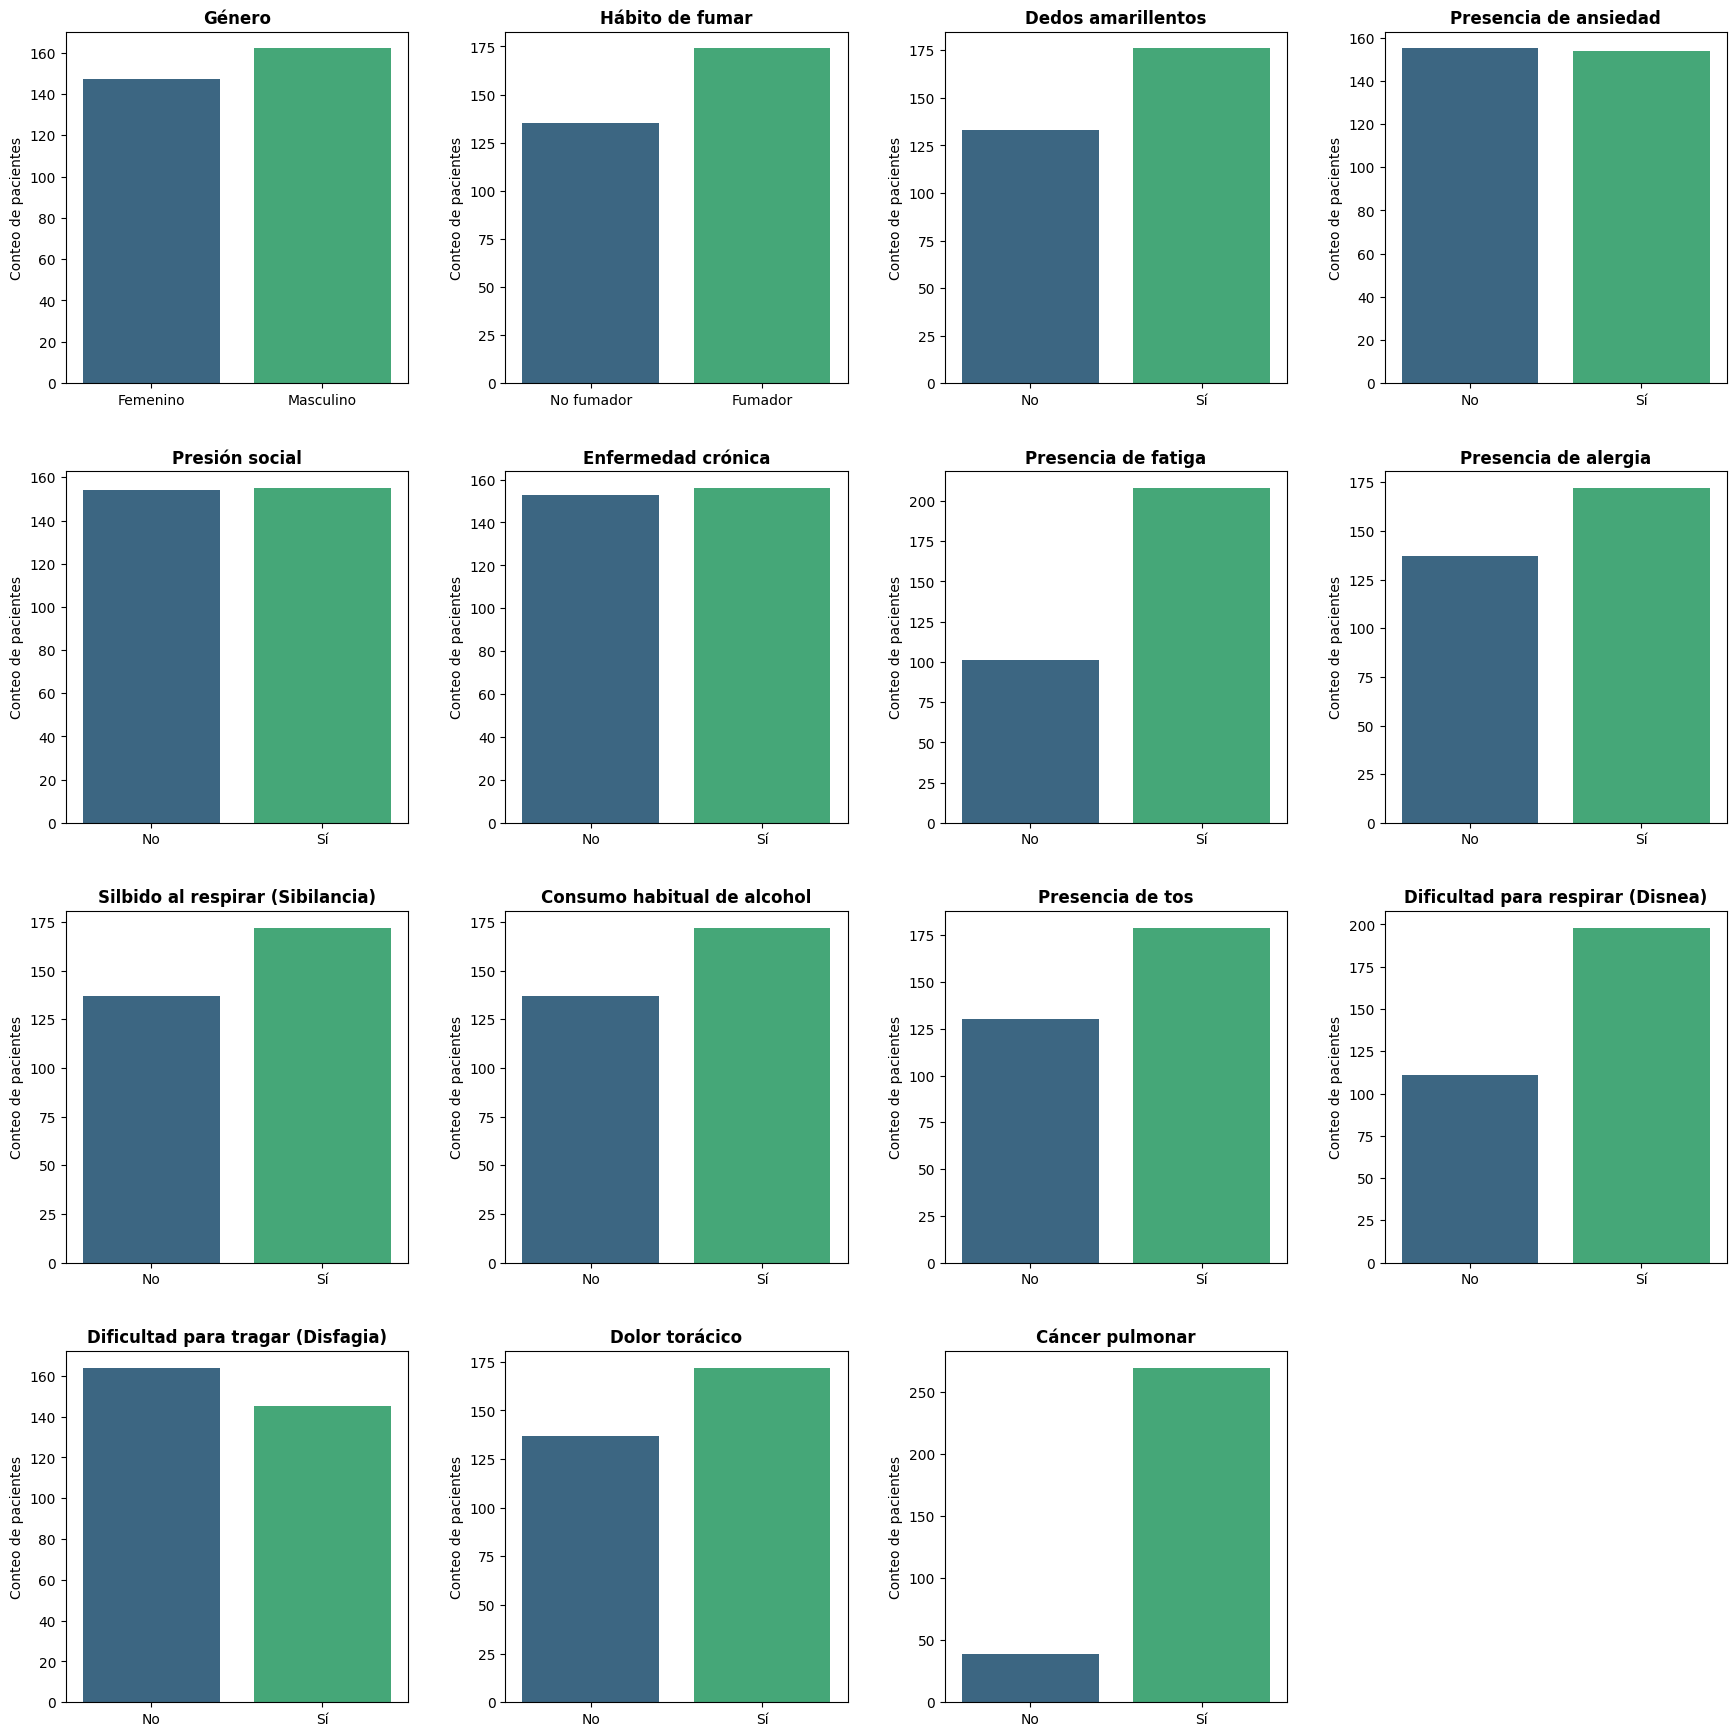

In [13]:
# Gráficos de barras para las características binarias
etiquetas = {
    'GENDER': ['Femenino', 'Masculino'],
    'SMOKING': ['No fumador', 'Fumador'],
    'YELLOW_FINGERS': ['No', 'Sí'],
    'ANXIETY': ['No', 'Sí'],
    'PEER_PRESSURE': ['No', 'Sí'],
    'CHRONIC_DISEASE': ['No', 'Sí'],
    'FATIGUE': ['No', 'Sí'],
    'ALLERGY': ['No', 'Sí'],
    'WHEEZING': ['No', 'Sí'],
    'ALCOHOL_CONSUMING': ['No', 'Sí'],
    'COUGHING': ['No', 'Sí'],
    'SHORTNESS_OF_BREATH': ['No', 'Sí'],
    'SWALLOWING_DIFFICULTY': ['No', 'Sí'],
    'CHEST_PAIN': ['No', 'Sí'],
    'LUNG_CANCER': ['No', 'Sí']
}

titulos = {
    'GENDER': 'Género',
    'SMOKING': 'Hábito de fumar',
    'YELLOW_FINGERS': 'Dedos amarillentos',
    'ANXIETY': 'Presencia de ansiedad',
    'PEER_PRESSURE': 'Presión social',
    'CHRONIC_DISEASE': 'Enfermedad crónica',
    'FATIGUE': 'Presencia de fatiga',
    'ALLERGY': 'Presencia de alergia',
    'WHEEZING': 'Silbido al respirar (Sibilancia)',
    'ALCOHOL_CONSUMING': 'Consumo habitual de alcohol',
    'COUGHING': 'Presencia de tos',
    'SHORTNESS_OF_BREATH': 'Dificultad para respirar (Disnea)',
    'SWALLOWING_DIFFICULTY': 'Dificultad para tragar (Disfagia)',
    'CHEST_PAIN': 'Dolor torácico',
    'LUNG_CANCER': 'Cáncer pulmonar'
}

# Preparación de la figura:
cols_binarias = slc.columns.drop('AGE').tolist()
num_plots = len(cols_binarias)
rows = (num_plots + 3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(18, rows * 4.5))
axes = axes.flatten()

# Generación de los gráficos:
for i, col in enumerate(cols_binarias):
    if col in etiquetas:
        sns.countplot(x=col, hue=col, data=slc, ax=axes[i], palette='viridis', legend=False)

        axes[i].set_title(f'{titulos.get(col, col)}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('')

        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(etiquetas[col], rotation=0)
        axes[i].set_ylabel('Conteo de pacientes', fontsize=10)

# Oculta los ejes restantes si hay más subplots que columnas.
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()


                          GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC_DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL_CONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.1

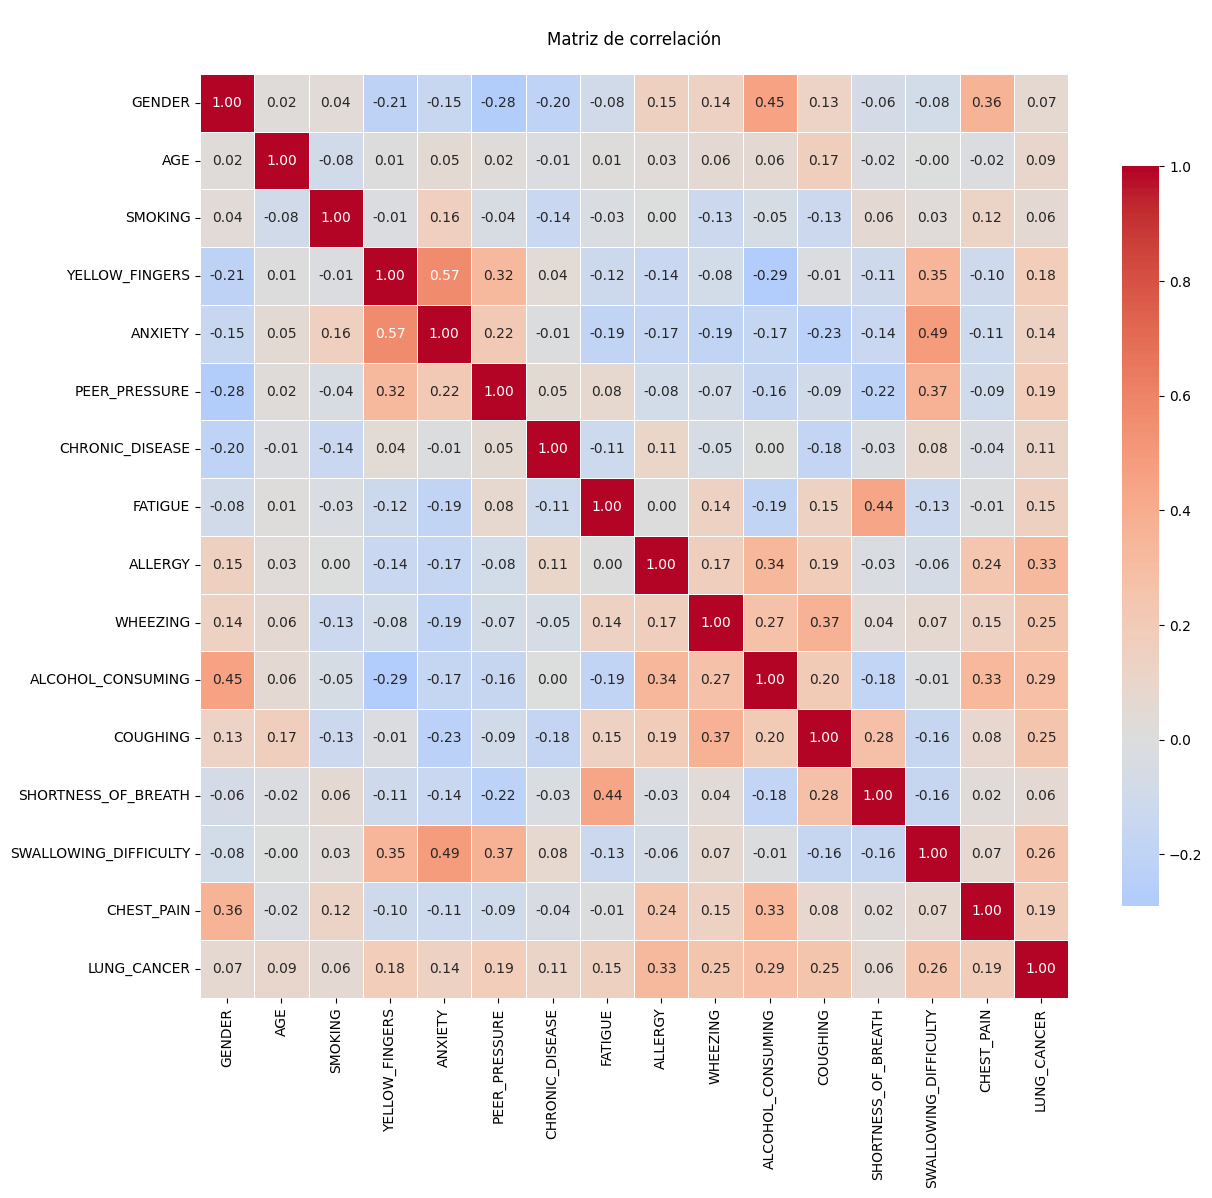

In [14]:
# Matriz de correlación:
correlation_matrix = slc.corr()
print('\n', correlation_matrix, '\n')

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',
    cmap='coolwarm', center=0, linewidths=.5, cbar_kws={'shrink': .8})

plt.title('\nMatriz de correlación\n', fontsize=12)
plt.show()

Al examinar la última fila/columna pueden denotarse los sig. predictores lineales:
* **Moderada peositiva:** **SWALLOWING_DIFFICULTY** (0.37) es el indicador lineal más fuerte, lo que sugiere que este síntoma es el más asociado con el diagnóstico de cáncer de pulmón.
* **Débil a moderada positiva:** **SHORTNESS_OF_BREATH** (0.30) y **FATIGUE** (0.29) también muestran una asociación significativa y positiva, como se esperaría de síntomas respiratorios.
* **Correlaciones débiles:** **WHEEZING** (0.25) y **ALLERGY** (0.25) son los siguientes en fuerza, seguidos por **YELLOW_FINGERS** (0.18) y **ANXIETY** (0.14).
* **Correlaciones nenores:** Los factores de riesgo clásicos como **SMOKING** (0.06), **AGE** (0.09) y **CHRONIC_DISEASE** (0.01) muestran una asociación lineal mínima con el cáncer de pulmón (algo sorprendente, pues el fumar siempre es relacionado con el cáncer de pulmón). **ALCOHOL_CONSUMING** presenta una correlación casi nula (-0.00).
> Los síntomas físicos directos y potencialmente más avanzados están mucho más correlacionados linealmente con el diagnóstico que los factores de riesgo conductuales.

Existen varias correlaciones fuertes entre las variables predictoras, lo que indica que algunas características están midiendo conceptos similares o son altamente dependientes entre sí:
* **Relación fuerte (0.57):** La asociación más fuerte en todo el conjunto se da entre **YELLOW_FINGERS** y **ANXIETY**.
* **Relación moderada (0.49):** **ANXIETY** también muestra una fuerte correlación con **SWALLOWING_DIFFICULTY**.
* **Asociación de género (0.45):** Hay una correlación moderada entre **GENDER** y el **ALCOHOL_CONSUMING**, lo que sugiere que un género específico tiene una tasa de consumo notablemente más alta, en este caso (y lamentablemente), serían los hombres.
* **Síntomas respiratorios:** **COUGHING** correlaciona fuertemente con **SHORTNESS_OF_BREATH** (0.28) y con **WHEEZING** (0.37).

Por otro lado, Las correlaciones negativas indican que la presencia de una variable disminuye la probabilidad de la otra:
* **YELLOW_FINGERS** tiene una correlación negativa moderada con **ALCOHOL_CONSUMING** (-0.29).
* **GENDER** se correlaciona negativamente con **PEER_PRESSURE** (-0.28).

----

#### III. PREPARACIÓN FINAL DE DATOS

In [22]:
# Separación de características (X) y variable objetivo (y):
y = slc['LUNG_CANCER']
X = slc.drop('LUNG_CANCER', axis=1)

> Nótese que se ha usado el 70% para entrenamiento y 30% para prueba. Dado que el Dataset está bastante desbalanceado en cuestión de detección de cáncer (270 'SÍ' vs 39 'NO'), 'stratify' se asegura que ambos conjuntos (entrenamiento y prueba) mantengan la misma proporción.

In [19]:
# División del Dataset entre 'Train' y 'Test':
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

print(f'X-TRAIN: {X_train.shape}')
print(f'X-TEST: {X_test.shape}')

print(f'\nDistribución de LUNG_CANCER (Y-TRAIN)\n{y_train.value_counts(normalize=True)}')
print(f'\nDistribución de LUNG_CANCER (Y-TEST)\n{y_test.value_counts(normalize=True)}')

X-TRAIN: (216, 15)
X-TEST: (93, 15)

Distribución de LUNG_CANCER (Y-TRAIN)
LUNG_CANCER
1    0.875
0    0.125
Name: proportion, dtype: float64

Distribución de LUNG_CANCER (Y-TEST)
LUNG_CANCER
1    0.870968
0    0.129032
Name: proportion, dtype: float64


In [20]:
# Escalado de la característica 'AGE'.

# Para evitar advertencias creamos copias e inicialiamos el StandardScaler:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
scaler = StandardScaler()

# El escalador ha de ajustarse únicamente con los datos de entrenamiento de 'AGE':
scaler.fit(X_train_scaled[['AGE']])
X_train_scaled['AGE'] = scaler.transform(X_train_scaled[['AGE']])
X_test_scaled['AGE'] = scaler.transform(X_test_scaled[['AGE']])

print('\n---- DATOS DE LA EDAD TRAS EL ESCALADO (ENTRENAMIENTO)')
print(X_train_scaled['AGE'].describe())


---- DATOS DE LA EDAD TRAS EL ESCALADO (ENTRENAMIENTO)
count    2.160000e+02
mean     1.027984e-16
std      1.002323e+00
min     -3.293199e+00
25%     -6.688455e-01
50%     -7.836610e-02
75%      7.745486e-01
max      2.349160e+00
Name: AGE, dtype: float64


* **Elección (StandardScaler)**: Se aplica la **StandardScaler** solo a la columna 'AGE', ya que es la única característica no binaria (continua). Los modelos que se usarán después son sensibles a la escala. Sin escalado, 'AGE' (rango 21-87) dominaría sobre las otras características (rango 0-1).

* **¿Por qué no he hecho uso de MinMaxScaler?** Opté por StandardScaler porque, además de centrar los datos en 0 y escalarlos con desviación estándar 1, es menos sensible a los valores atípicos. Aunque el boxplot de 'AGE' no muestra outliers extremos, StandardScaler ofrece una normalización más robusta y adecuada para modelos que asumen distribución normal de las variables.

----

#### IV. SELECCIÓN Y ENTRENAMIENTO DE MODELOS

##### 1er Modelo: Regresión logística
> Este es un modelo de clasificación binaria fundamental, excelente como línea base y eficiente computacionalmente.

In [23]:
# Entrenamiento del modelo de regresión Logística.
log_model = LogisticRegression(random_state=42, class_weight='balanced')
log_model.fit(X_train_scaled, y_train) # Entrenamiento del modelo.

# Predicciones:
y_pred_log = log_model.predict(X_test_scaled)
y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1] # Probabilidades para la clase 1 (Cáncer).

> Este tipo de modelo es bastante robusto para clasificación binaria. Es interpretable y eficiente. Se utiliza el hiperparámetro class_weight='balanced' para que el modelo asigne pesos más altos a la clase minoritaria ('Sin cáncer'), ayudando a mitigar el fuerte desbalance del Dataset.

In [24]:
# Evaluación del modelo de regresión Logística.
print(f'Precisión: {accuracy_score(y_test, y_pred_log):.4f}')

print('\nMatriz de confusión:')
print(confusion_matrix(y_test, y_pred_log))

print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred_log, target_names=['Sin cáncer (0)', 'Con cáncer (1)']))

# Por último, el cálculo de AUC (Área bajo la curva):
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)
print(f'AUC: {auc_log:.4f}')

Precisión: 0.8710

Matriz de confusión:
[[12  0]
 [12 69]]

Reporte de clasificación:
                precision    recall  f1-score   support

Sin cáncer (0)       0.50      1.00      0.67        12
Con cáncer (1)       1.00      0.85      0.92        81

      accuracy                           0.87        93
     macro avg       0.75      0.93      0.79        93
  weighted avg       0.94      0.87      0.89        93

AUC: 0.9619


* **Accuracy (Precisión)**: 87.10%. Es alta, pero engañosa debido al desbalance.
* **Recall (Sin cáncer - 0)**: 1.00 (Detectó a todos los sanos).
* **Recall (Con cáncer - 1)**: 0.85 (Detectó al 85% de los enfermos).

* **AUC**: 0.9619. Posee una capacidad bastante buena para distinguir entre clases.

##### 2do Modelo: K--NN
> Este es un modelo basado en instancia, simple y efectivo. He de mencionar que el escalado es fundamental para su rendimiento.

In [26]:
# Entrenamiento del modelo K-NN (GridSearchCV)
knn = KNeighborsClassifier() # Modelo base.

# Cuadrícula de hiperparámetros a probar (k de 1 a 20)
param_grid_knn = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance']
}

# Configuración de GridSearchCV. Usando 'f1_weighted' como métrica de scoring.
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_weighted')
grid_knn.fit(X_train_scaled, y_train) # Entrenamiento del grid.

# Obtener el mejor modelo:
best_knn = grid_knn.best_estimator_
print(f'Mejores hiperparámetros (K-NN): {grid_knn.best_params_}')

# Predicciones:
y_pred_knn = best_knn.predict(X_test_scaled)
y_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

Mejores hiperparámetros (K-NN): {'n_neighbors': 3, 'weights': 'distance'}


> El rendimiento de este segundo modelo depende críticamente del escalado de características, ya que se basa en distancias.

* **GridSearchCV**: Se utiliza GridSearchCV para el ajuste de hiperparámetros. Se prueba un rango de n_neighbors (k) de 1 a 20 y dos tipos de weights.
* **Métrica de ajuste**: Se usa scoring='f1_weighted', ya que el F1-Score (media armónica de precisión y recall) ponderado es una métrica mucho más fiable que 'accuracy' para datasets desbalanceados.

In [27]:
# Evaluación del modelo (K-NN)
print(f'Precisión: {accuracy_score(y_test, y_pred_knn):.4f}')

print('\nMatriz de confusión:')
print(confusion_matrix(y_test, y_pred_knn))

print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred_knn, target_names=['Sin cáncer (0)', 'Con cáncer (1)']))

# Por último, el cálculo de AUC (Área bajo la curva):
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
auc_knn = auc(fpr_knn, tpr_knn)
print(f'AUC: {auc_knn:.4f}')

Precisión: 0.8925

Matriz de confusión:
[[ 7  5]
 [ 5 76]]

Reporte de clasificación:
                precision    recall  f1-score   support

Sin cáncer (0)       0.58      0.58      0.58        12
Con cáncer (1)       0.94      0.94      0.94        81

      accuracy                           0.89        93
     macro avg       0.76      0.76      0.76        93
  weighted avg       0.89      0.89      0.89        93

AUC: 0.9084


* **Accuracy**: 89.25%

* **Recall (Sin cáncer - 0)**: 0.58 Detecta correctamente solo el 58% de paciente sin cáncer, fallando el resto.
* **Recall (Con cáncer - 1)**: 0.94 Detecta correctamente el 94 % de los pacientes con cáncer.

* **AUC**: 0.9084. Posee una buena capacidad de distinción, aunque menor que la regresión logística.

##### 3er Modelo: Random Forest
> Este es un modelo de ensamble robusto, menos propenso al sobreajuste que un solo árbol de decisión y, se dice, maneja bien el desbalance.

In [29]:
# Entrenamiento del modelo Random Forest.
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced_subsample')
rf_model.fit(X_train_scaled, y_train) # Entrenamiento.

# Predicciones:
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

> Random Forest, al igual que la regresión logística, utiliza class_weight='balanced_subsample' para contrarrestar el desbalance de clases durante el entrenamiento de cada árbol.

In [30]:
# Evaluación del modelo (Random Forest)
print(f'Precisión: {accuracy_score(y_test, y_pred_rf):.4f}')

print('\nMatriz de confusión:')
print(confusion_matrix(y_test, y_pred_rf))

print('\nReporte de clasificación:')
print(classification_report(y_test, y_pred_rf, target_names=['Sin cáncer (0)', 'Con cáncer (1)']))

# Por último, el cálculo de AUC (Área bajo la curva):
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print(f'AUC: {auc_rf:.4f}')

Precisión: 0.9247

Matriz de confusión:
[[ 9  3]
 [ 4 77]]

Reporte de clasificación:
                precision    recall  f1-score   support

Sin cáncer (0)       0.69      0.75      0.72        12
Con cáncer (1)       0.96      0.95      0.96        81

      accuracy                           0.92        93
     macro avg       0.83      0.85      0.84        93
  weighted avg       0.93      0.92      0.93        93

AUC: 0.9609


* **Accuracy**: 92.47% (La más alta).

* **Recall (Sin cáncer - 0)**: 0.75 Detecta correctamente al 75% de pacientes sin cáncer.
* **Recall (Con cáncer - 1)**: 0.95 Detecta correctamente el 95% de pacientes con cáncer (la medida más alta).

* **AUC**: 0.9609. Excelente, compite bastante bien con la regresión logística.

----

#### V. EVALUACIÓN Y COMPARACIÓN DE MODELOS

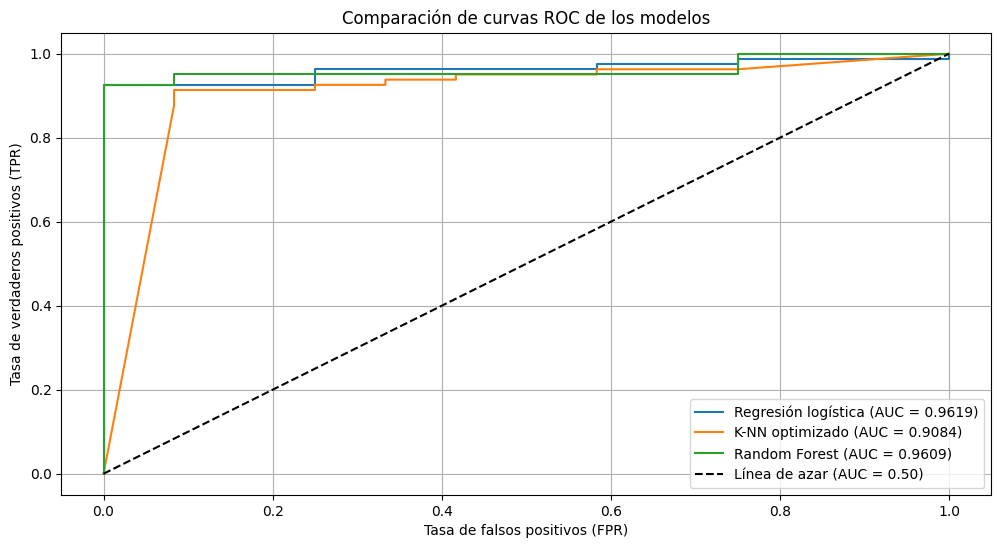

In [34]:
plt.figure(figsize=(12, 6))

# Curva para el modelo de regresión logística:
plt.plot(fpr_log, tpr_log, label=f'Regresión logística (AUC = {auc_log:.4f})')

# Curva para el modelo K-NN:
plt.plot(fpr_knn, tpr_knn, label=f'K-NN optimizado (AUC = {auc_knn:.4f})')

# Curva para el modelo Random Forest:
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')

# Línea de azar:
plt.plot([0, 1], [0, 1], 'k--', label='Línea de azar (AUC = 0.50)')

print('\n')
plt.xlabel('Tasa de falsos positivos (FPR)')
plt.ylabel('Tasa de verdaderos positivos (TPR)')
plt.title('Comparación de curvas ROC de los modelos')
plt.legend()
plt.grid()
plt.show()
print('\n')

> La curva ROC (Receiver Operating Characteristic) mide la capacidad de un modelo para distinguir entre las clases (0 y 1) en todos los umbrales de probabilidad. El AUC (Area Under the Curve) resume esta capacidad en un solo número (más cercano a 1.0 es mejor).

* Tanto **Random Forest** (0.961) como **Regresión logística** (0.962) muestran una capacidad de discriminación casi perfecta y superior.
* **K-NN** (0.908) es bueno, pero notablemente inferior a los otros dos modelos.

> Dado que el objetivo es predecir cáncer de pulmón se debe tener en cuenta que, En un escenario médico, el costo de un Falso Negativo (FN) (predecir 'Sin cáncer' cuando el paciente SÍ tiene) es extremadamente alto (riesgo de muerte); mientras que el costo de un Falso Positivo (FP) (predecir 'Con cáncer' cuando el paciente NO tiene) es menor (ansiedad temporal, y quizá más estudios).

* Por lo tanto, la métrica más importante es el **Recall (Sensibilidad)**, pues es deseable maximizar este valor para minimizar los Falsos Negativos.
* De igual manera, y dado el desbalance de clases, el **F1-Score (ponderado)** es el mejor indicador del rendimiento general (equilibrio Precisión-Recall), y el **Recall** también es importante para no generar demasiados Falsos Positivos.

> Selección final: **Random Forest** parece ser el mejor modelo.

* Logra el **Recall (Sensibilidad)** indica que es el modelo que menos Falsos Negativos produce.
* Tiene el **Accuracy (Precisión) más alto (0.925) y el **F1-Score (ponderado)** más alto (0.93), indicando el mejor rendimiento general y el mejor equilibrio.
* Mantiene un **Recall** de Clase 0 (0.75) muy respetable, minimizando los Falsos Positivos mejor que el K-NN.

* Por último, su **AUC** (0.961) es excelente, demostrando una alta capacidad de discriminación... Hehe.

----

#### VI. PERSISTENCIA DEL MODELO Y PREPROCESADOR

In [37]:
# Ruta de la carpeta en la cual se guardarán los archivos:
models_dir = Path('../Models')
models_dir.mkdir(parents=True, exist_ok=True)

# Guardado del modelo preferido (Random Forest):
joblib.dump(rf_model, models_dir / 'randomForest.joblib')

# Guardado del objeto StandardScaler
joblib.dump(scaler, models_dir / 'standardScaler.joblib')

print('\nBuah! El modelo ha sido guardado... con éxito.')


Buah! El modelo ha sido guardado... con éxito.


----